# Characterising Individual Models

Growth Rates and Yield

In [2]:
import cobra.io

models = []
model_paths = ["../../data/GD.xml", "../../data/AG.xml", "../../data/iJO1366.xml", "../../data/iHK1487.xml"]

for i in range(len(model_paths)):
    models.append(cobra.io.read_sbml_model(model_paths[i]))

# vars for Convienince
GD = models[0]
AG = models[1]
iJO = models[2]
iHK = models[3]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-10


## Basic Model Statistics
Generate some basic model statistics for display in paper

In [27]:
import csv

with open('basic_model_properties.csv', 'w') as fil:
    # create the csv writer
    writer = csv.writer(fil)
    title = ["ID","Model ID","Genes","Rxns","Metabolites", "Objective Function"]
    writer.writerow(title)
    
    for model in [AG,GD]:
        x = [
            "NameHere",
            model.id,
            len(model.genes),
            len(model.reactions),
            len(model.metabolites),
            [i.id for i in model.reactions if i.objective_coefficient != 0][0]
        ]
        writer.writerow(x)


In [ ]:
# AG.problem.Model.mro # come back to this for the comunity model

## Cases - Checking Effect of Modifications.

In [ ]:
# Eyeball the medium configurations for each of the models

In [40]:
import importlib
import utils
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\domin\\Submission\\project\\utils\\utils.py'>

In [53]:
# Each indicies position corresponds to a case number.
# CASES
# 0 - WT with respect to Auxotrophy, can synthesise targeted aa
# 1 - MT with respect to Auxotrophy, cannot synthesise targeted aa , medium supplemented.
# 2 - MT with respect to Auxotrophy, medium not supplemented.

from utils import set_bound_modifications, runcases

AG_tgt  = "HPAA_ADH"
GD_tgt  = "SALIDROSIDE_BIOSYNTHESIS"

AG_gr = [] # Growth Rate
GD_gr = [] # Growth Rate

AG_tmy = [] # Theoretical Max Yield
GD_tmy = [] # Theoretical Max Yield

# Cases consist of simple csv files of the rxn bounds to modify: rxn,lb,ub
AG_gr, AG_tmy = runcases(AG, "../../data/ind_mod_cases/AG", AG_tgt)
GD_gr, GD_tmy = runcases(GD, "../../data/ind_mod_cases/GD", GD_tgt)



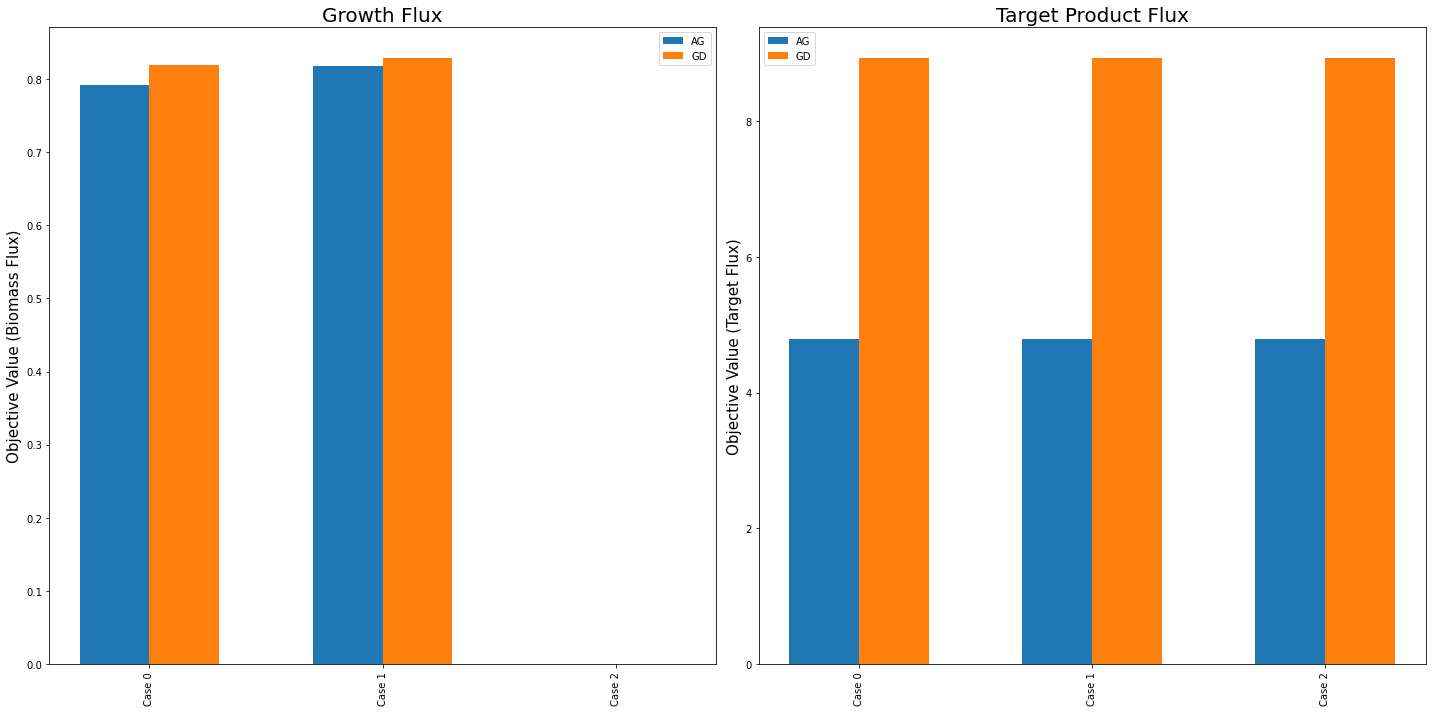

In [61]:
# Graphing the individual modifications: 
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

# Using the variable axs for multiple Axes
fig, axs = plt.subplots(1, 2,figsize=(20,10)) # Make it a larger figure 
width = 0.3
offset = width/2

# axis 1 - growth
y = AG_gr
x = np.arange(len(y))
axs[0].bar(x-offset,y, width=width, label = "AG")

y = GD_gr
axs[0].bar(x+offset,y, width=width, label = "GD")
axs[0].legend()

axs[0].tick_params("x", rotation=90)
# axs[0].set_xlabel("Case")
axs[0].set_ylabel("Objective Value (Biomass Flux)", fontsize = 15)
axs[0].set_xticks(x, ["Case 0","Case 1", "Case 2"])
axs[0].set_title("Growth Flux",fontsize = 20)


# axis 2 - Tgt Product
y = AG_tmy
x = np.arange(len(y))
axs[1].bar(x-offset,y, width=width, label = "AG")

y = GD_tmy
axs[1].bar(x+offset,y, width=width, label = "GD")
axs[1].legend()


axs[1].tick_params("x", rotation=90)
# axs[1].set_xlabel("Case")
axs[1].set_ylabel("Objective Value (Target Flux)",fontsize = 15)
axs[1].set_xticks(x, ["Case 0","Case 1", "Case 2"])
axs[1].set_title("Target Product Flux",fontsize = 20)


# Save plot to overleaf
fig.tight_layout()
fig.savefig(f"C:/Users/domin/Masters-Thesis---Draft-1/images/IndOpt/Individual_case_results.pdf", bbox_inches = 'tight', pad_inches=0.2)


The discrepancy between biomass flux and target product flux under case 3 highlights a potential weakness of modelling, in that the objective function is blind to biological feasibility. 
In case 3 biomass production & hence the viability of the cell is indicated to be null for both strains where their auxotrophic amino acid is not present in the media.
Despite this, the maximum flux through the respective target product fluxes is unaffected, which is indicative that TODO

From this we might expext that the target metabolite production reactions and growth (biomass flux) do not have a relationship represented in the model. When production envelopes are generated for these reactions we can indeed see the characteristic shap of an un-coupled reaction, with the minimum flux for the production reactions consistantly zero for any point along the biomass flux range.

Note also that the maximum yield of tyrosine is less than the maximum yield of salidroside. If there is a straightforward realationship between them then this may be a bottleneck.

# How critical are the auxotrophic Amino Acids?

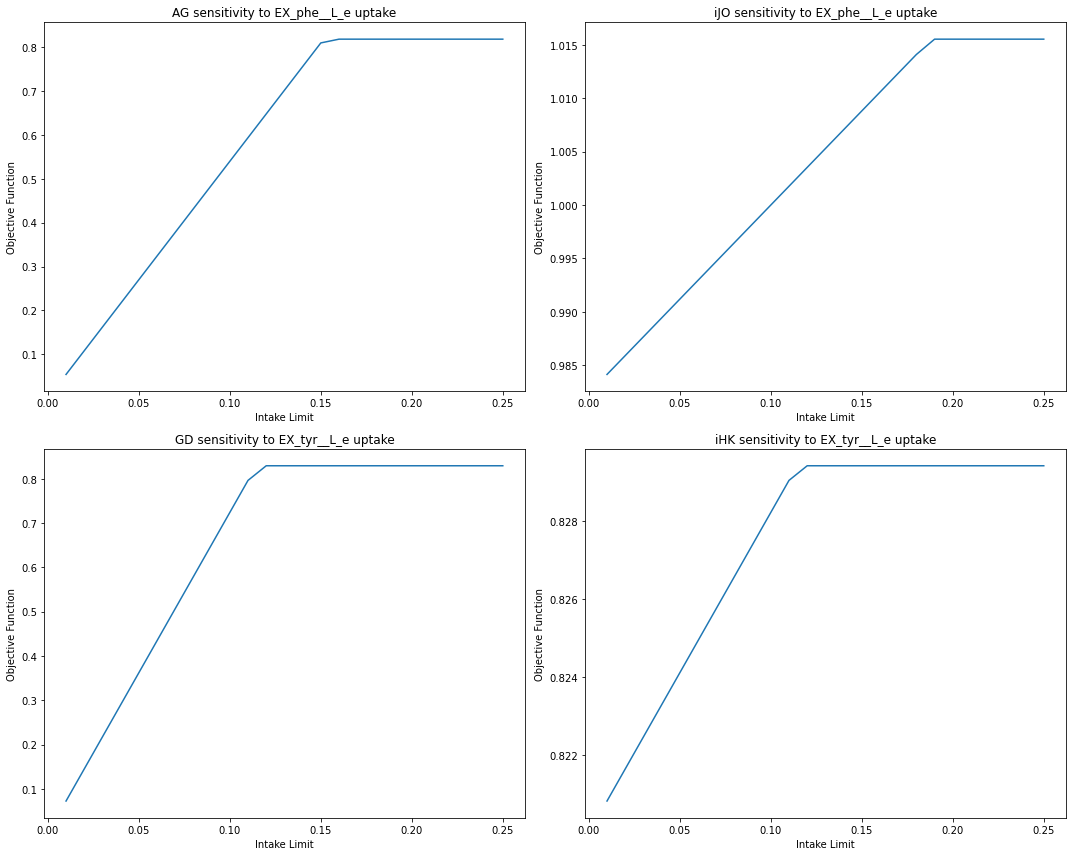

In [101]:
import enum
import importlib
import utilPlots
importlib.reload(utilPlots)
import matplotlib as mp
import matplotlib.pyplot as plt
from numpy import ravel

from utilPlots import generate_uptake_sensitiviy_data

cutoff = -0.25

RUNS  = [
    [AG,"AG","EX_phe__L_e", cutoff, 0.01],
    [iJO,"iJO","EX_phe__L_e", cutoff, 0.01],
    [GD,"GD","EX_tyr__L_e", cutoff, 0.01],
    [iHK,"iHK","EX_tyr__L_e", cutoff, 0.01]
]

fig = plt.figure(figsize=(15, 12))
for n, run in enumerate(RUNS):
    ax = plt.subplot(2, 2, n+1)
    a,b = generate_uptake_sensitiviy_data(RUNS[n][0],RUNS[n][2],RUNS[n][3],RUNS[n][4])
    ax.plot(a,b)
    ax.set_ylabel("Objective Function")
    ax.set_xlabel("Intake Limit")
    ax.set_title(f"{RUNS[n][1]} sensitivity to {RUNS[n][2]} uptake")

# Save plot to overleaf
fig.tight_layout()
fig.savefig(f"C:/Users/domin/Masters-Thesis---Draft-1/images/IndOpt/AASensitivity_Composite.pdf", bbox_inches = 'tight', pad_inches=0.2)

# Production Envelopes

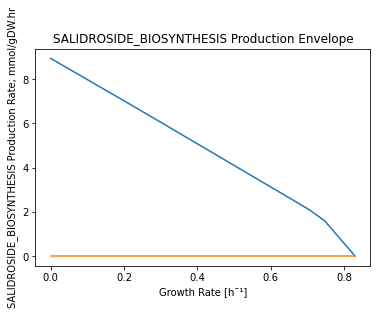

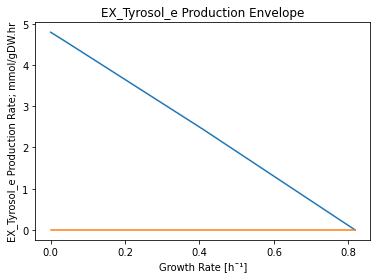

In [114]:
# Standard MT
import utils
importlib.reload(utils)
from utils import pe

with GD:
    GD.reactions.EX_Tyrosol_e.bounds = (-10,1000)
    pe(GD,"SALIDROSIDE_BIOSYNTHESIS")
pe(AG,"EX_Tyrosol_e")

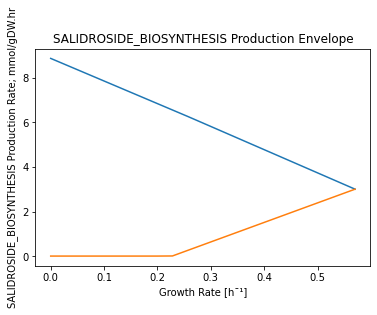

In [115]:
# Growth Couple the Production of Salidroside in the GD strain.

strat = ["TALA","EDD","FBA","F6PA","PPM2","AGM4PApp","INDOLEt2pp","AGM3PApp"] 

# for rxn in GD.reactions:
#     if rxn.id in strat: 
#         print(rxn.id, rxn.name)

with GD as model:
    GD.reactions.EX_Tyrosol_e.bounds = (-10,1000)

    # print(model.slim_optimize())
    # model.reactions.EX_fru_e.lower_bound = -10
    model.reactions.TALA.bounds = (0.0, 0.0) 
    model.reactions.EDD.bounds = (0.0, 0.0)
    model.reactions.FBA.bounds = (0.0, 0.0)
    model.reactions.F6PA.bounds = (0.0, 0.0)
    model.reactions.PPM2.bounds = (0.0, 0.0)
    model.reactions.AGM4PApp.bounds = (0.0, 0.0)
    model.reactions.INDOLEt2pp.bounds = (0.0, 0.0)
    model.reactions.AGM3PApp.bounds = (0.0, 0.0)
    # a= model.optimize()
    # a,b,c,d = pe_data(model, "SALIDROSIDE_BIOSYNTHESIS")
    # pe_plot(a,b,c,d)
    pe(model,"SALIDROSIDE_BIOSYNTHESIS")

# What is the growth coupling potential here?
# defined as the amount with which the maximal growth rate will be decreased by preventing the target compound from being produced.



# Different Primary Carbon Substrates Scan
Optional plot of the maximum growth rate attainable by each strain on a set of common carbon substrates.